In [1]:
import datetime
import pandas as pd

In [ ]:
stockcode ='SBIN'

ts1 = str(int(datetime.datetime(2020, 7, 20).timestamp())) 
ts2 = str(int(datetime.datetime(2020, 7, 25).timestamp()))

#interval = '1d'
interval = '1wk'
#interval = '1mo'

events = 'history'
#events = 'div'
#events = 'split'

url = 'https://query1.finance.yahoo.com/v7/finance/download/'\
      + stockcode + '.NS?period1=' + ts1 + '&period2=' + ts2 + '&interval='\
      + interval + '&events=' + events

print(url)
print (ts1, ts2)

In [ ]:
try:
    stockdata = pd.read_csv(url)
    print(stockdata)
except:
    print("Not able to fetch value for code : "+stockcode)
    print("Either stock code is not correct or could be connectivity issue..")

In [1]:
#!pip install yfinance
!pip install ta

  Created wheel for ta: filename=ta-0.6.1-cp37-none-any.whl size=27344 sha256=21512b815b052586a14f8c3fd79343b340d74b345e3ffe1708d47fa9d1ed498f
  Stored in directory: C:\Users\23132668\AppData\Local\pip\Cache\wheels\1e\f0\60\7ff1d2f1b55f4bb49c92740f01da7b0a33c60b6573a5909831
Successfully built ta


In [ ]:
!pip install TA-Lib

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed
            ASHOKLEY.NS  EVEREADY.NS      M&M.NS    MARUTI.NS  MOTHERSUMI.NS  \
Date                                                                           
2018-01-01   104.483192   434.526306  725.379150  9269.234375     239.320435   
2018-01-02   108.622009   433.292542  733.415649  9175.262695     239.131058   
2018-01-03   109.634697   433.045807  735.363892  9043.261719     236.038376   
2018-01-04   111.792160   434.921112  736.435364  9014.115234     236.953110   
2018-01-05   112.232460   439.214539  736.776367  9059.828125     240.520203   

            TATACOMM.NS  TATAMOTORS.NS  
Date                                    
2018-01-01   663.256897     424.450012  
2018-01-02   656.212952     439.299988  
2018-01-03   654.158508     433.899994  
2018-01-04   660.077332     429.950012  
2018-01-05   657.631531     431.600006  


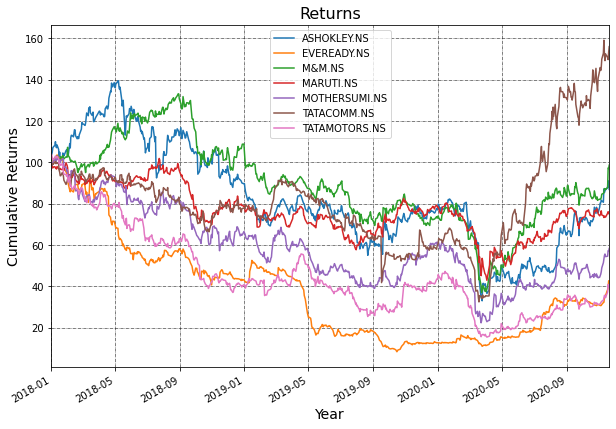

In [29]:
tickers_list = ['M&M.NS', 'TATAMOTORS.NS', 'MARUTI.NS', 'ASHOKLEY.NS', 'EVEREADY.NS', 'MOTHERSUMI.NS','TATACOMM.NS']
# Fetch the data
import yfinance as yf
data = yf.download(tickers_list,'2018-1-1')['Adj Close']
data1 = yf.download(tickers_list,'2018-1-1')['Close'].reset_index()
data2 = yf.download('M&M.NS','2016-01-01','2020-08-01')
# Print first 5 rows of the data
print(data.head())

# Plot all the close prices
(((data.pct_change()+1).cumprod())*100).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [2]:
#Trend Analysis
data[‘Day_Perc_Change’] = data[‘Adj Close’].pct_change()*100

def trend(x):
      if x > -0.5 and x <= 0.5:
        return ‘Slight or No change’
      elif x > 0.5 and x <= 1:
        return ‘Slight Positive’
      elif x > -1 and x <= -0.5:
        return ‘Slight Negative’
      elif x > 1 and x <= 3:
        return ‘Positive’
      elif x > -3 and x <= -1:
        return ‘Negative’
      elif x > 3 and x <= 7:
        return ‘Among top gainers’
      elif x > -7 and x <= -3:
        return ‘Among top losers’
      elif x > 7:
        return ‘Bull run’
      elif x <= -7:


SyntaxError: invalid character in identifier (<ipython-input-2-fae822d50968>, line 2)

In [10]:
def StockSelection(stockname,low,high):
    #Tenure in months
    df=pd.DataFrame()
    data2 = yf.download(stockname,'2021-01-01','2021-05-17').reset_index()
    df['Close Price']=data2['Close']
    # create 20 days simple moving average column
    df['LOW_SMA'] = df['Close Price'].rolling(window = low, min_periods = 1).mean()
    # create 50 days simple moving average column
    df['HIGH_SMA'] = df['Close Price'].rolling(window = high, min_periods = 1).mean()
    df['Signal'] = 0.0
    df['Signal'] = np.where(df['LOW_SMA'] > df['HIGH_SMA'], 1.0, 0.0)
    df['Position'] = df['Signal'].diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    df['Close Price'].plot(color = 'k', label= 'Close Price') 
    df['LOW_SMA'].plot(color = 'b',label = '20-day SMA') 
    df['HIGH_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot 'buy' signals
    plt.plot(df[df['Position'] == 1].index, 
             df['LOW_SMA'][df['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot 'sell' signals
    plt.plot(df[df['Position'] == -1].index, 
             df['LOW_SMA'][df['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    TITLE='Stock Analysis for '+str(stockname.split('.')[0])+'From'+str(data2['Date'].min().strftime('%d-%b-%Y'))+' To '+str(data2['Date'].max().strftime('%d-%b-%Y'))
    plt.title(TITLE, fontsize = 20)
    plt.legend()
    plt.grid()
    #plt.show()
    df.fillna(0,inplace=True)
    # Calculate Profit 
    dfnew=df.loc[df['Position']!=0,:]
    dfnew.reset_index(inplace=True)
    initialcash=1000000
    cashremaining=initialcash
    lossmargin= 10 #% of loss that you can take
    buyprice=0
    sellprice=0
    count=0
    totalprofit=0
    deposit=100000
    for i in range(dfnew.shape[0]):
        #print(cashremaining)
        if cashremaining>(1-(initialcash/100))*deposit:
            if dfnew.loc[i,'Position']>0:
                #Buy Share
                noofshares=np.round(cashremaining/dfnew.loc[i,'Close Price'])
                buyprice=noofshares*dfnew.loc[i,'Close Price']
                cashremaining=cashremaining-buyprice
                #print('No of shares Purchased ',noofshares,'Total Invested ',buyprice)  
            elif dfnew.loc[i,'Position']<0:
                #Sell Share
                sellprice=noofshares*dfnew.loc[i,'Close Price']
                profit=sellprice-buyprice
                #print('profit made ',profit,'Sold at ',sellprice)
                cashremaining=sellprice+cashremaining
                totalprofit=profit+totalprofit
        else:
            print('Trade Stopped with a loss',totalprofit,' and Current Value is',cashremaining)

    print(stockname,'Trade Stopped with a profit of ',totalprofit)

[*********************100%***********************]  1 of 1 completed
M&M.NS Trade Stopped with a profit of  -98972.41418457031
[*********************100%***********************]  1 of 1 completed
TATAMOTORS.NS Trade Stopped with a profit of  473394.1749267578
[*********************100%***********************]  1 of 1 completed
MARUTI.NS Trade Stopped with a profit of  -105870.7255859375
[*********************100%***********************]  1 of 1 completed
ASHOKLEY.NS Trade Stopped with a profit of  -160733.94216918945
[*********************100%***********************]  1 of 1 completed
EVEREADY.NS Trade Stopped with a profit of  379825.02729797363
[*********************100%***********************]  1 of 1 completed
MOTHERSUMI.NS Trade Stopped with a profit of  245826.7105102539
[*********************100%***********************]  1 of 1 completed
TATACOMM.NS Trade Stopped with a profit of  4342.1790771484375


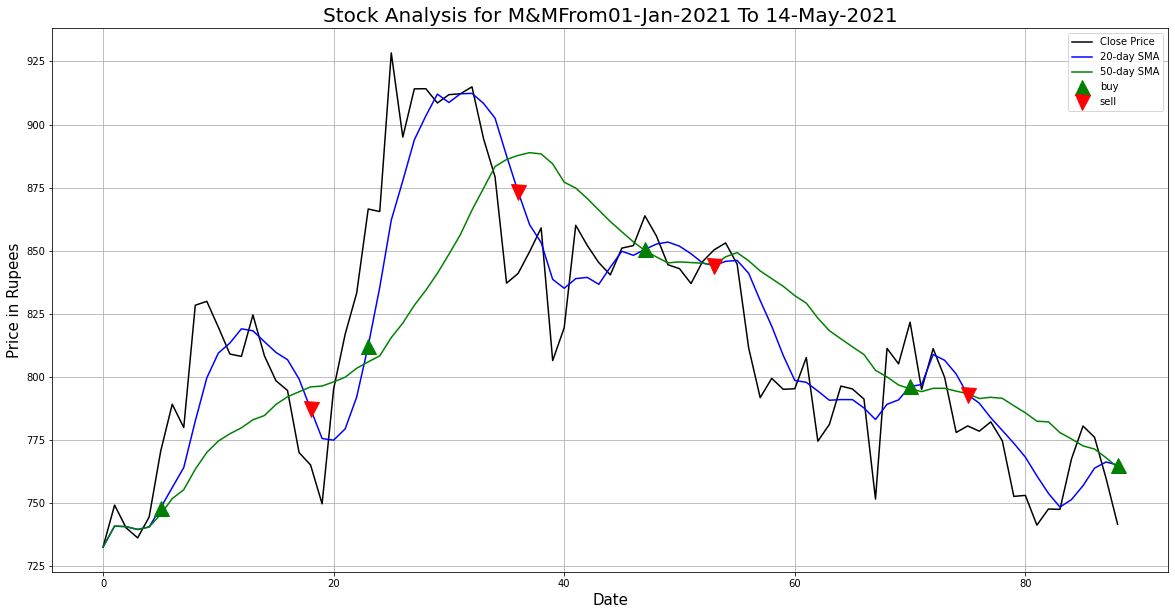

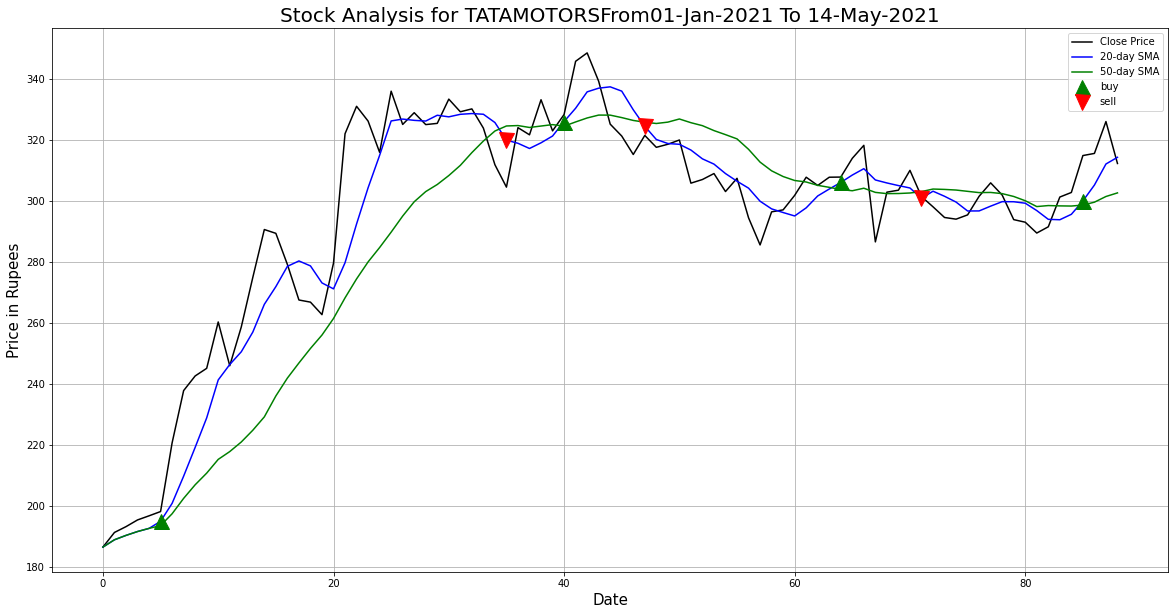

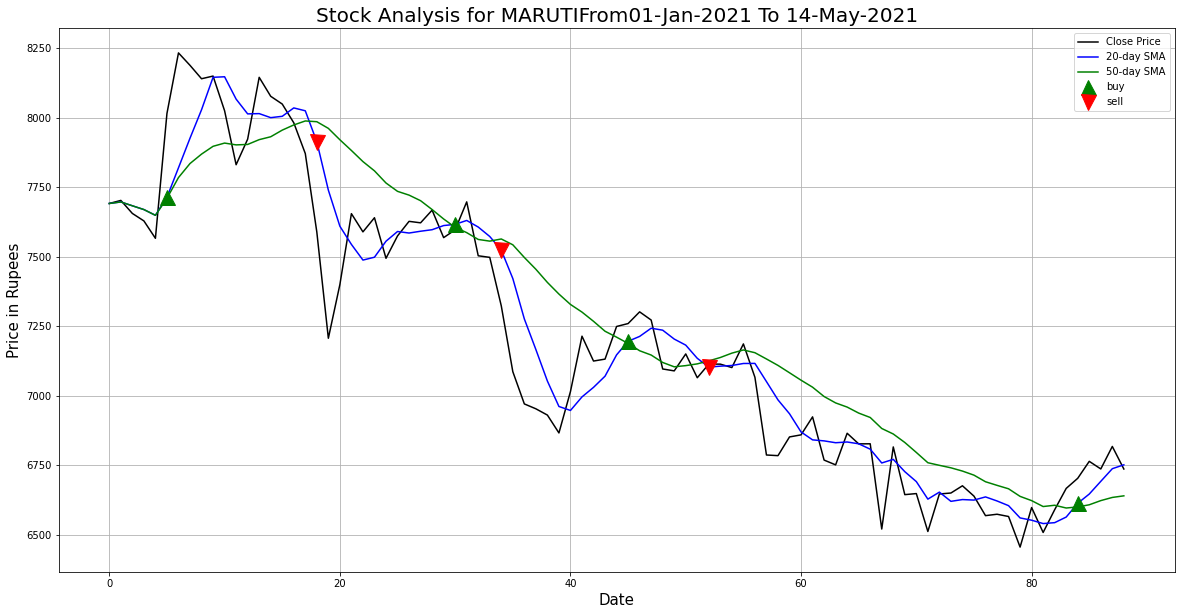

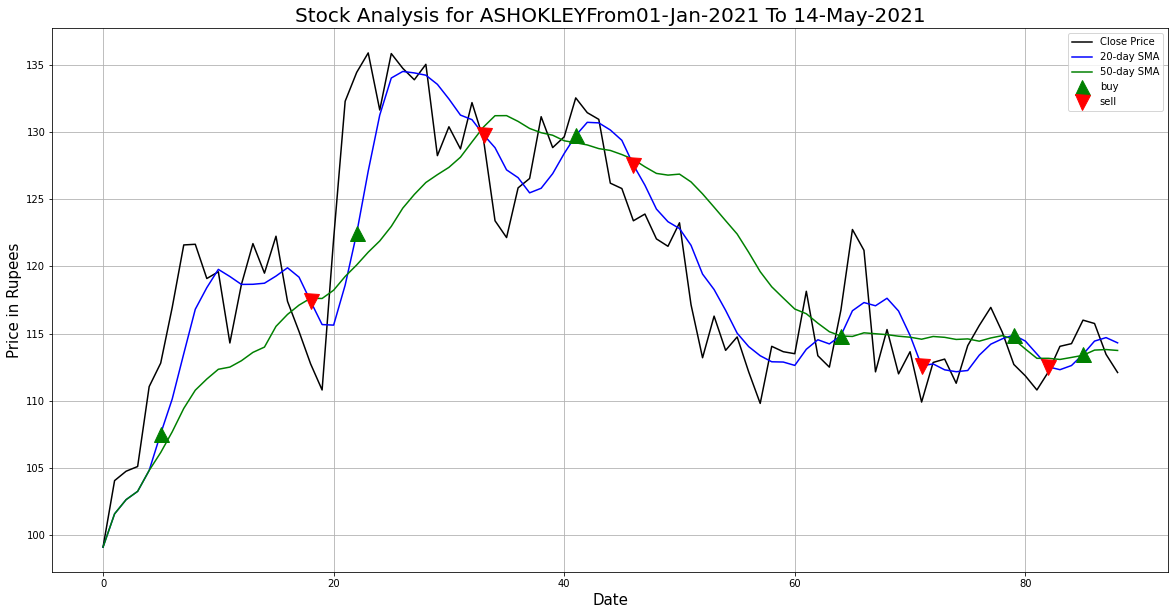

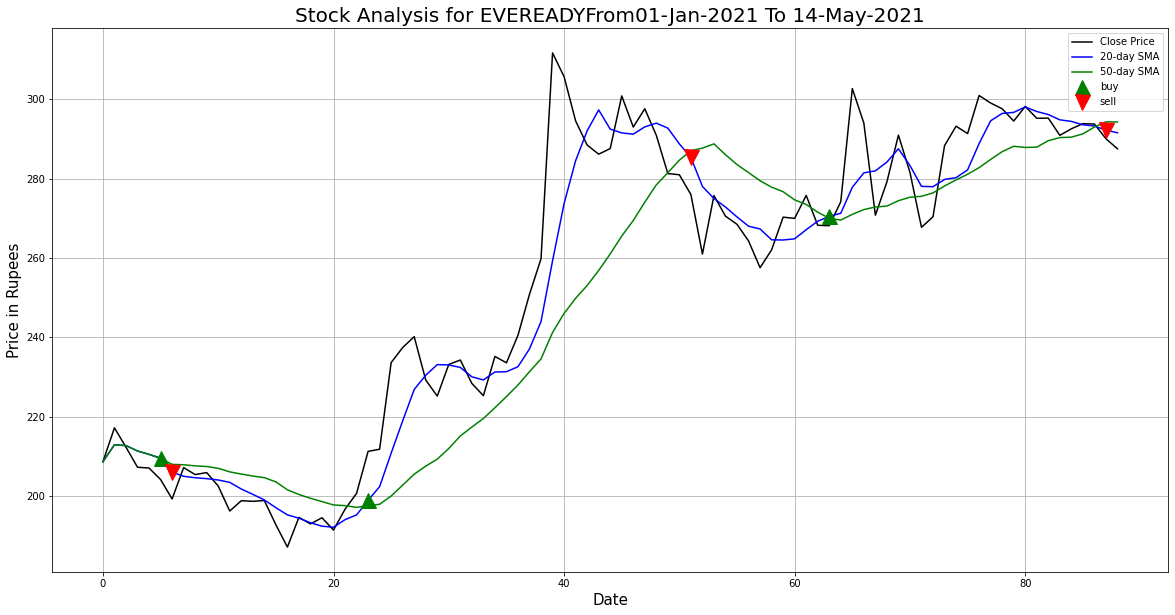

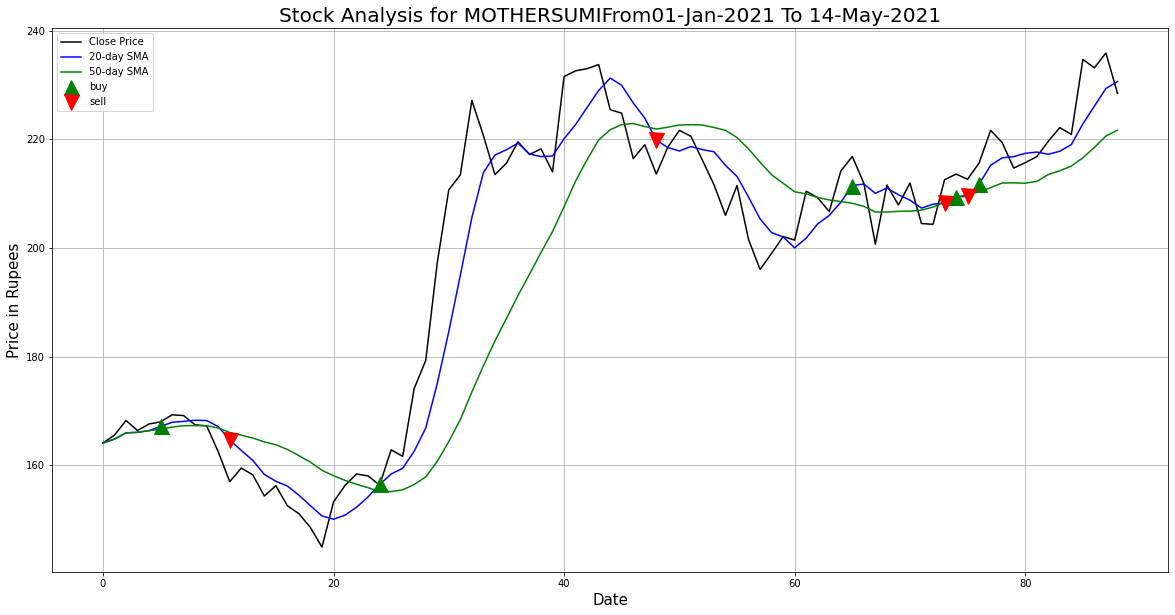

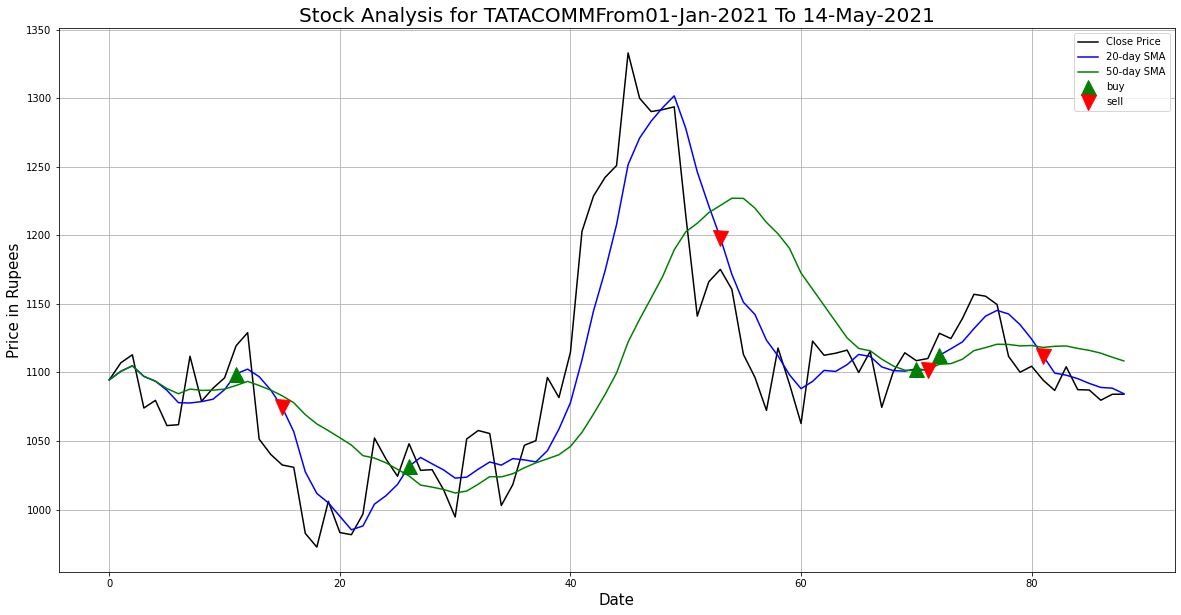

In [11]:
tickers_list = ['M&M.NS', 'TATAMOTORS.NS', 'MARUTI.NS', 'ASHOKLEY.NS', 'EVEREADY.NS', 'MOTHERSUMI.NS','TATACOMM.NS']
for stock in tickers_list:
    StockSelection(stock,5,15)

In [120]:
dfnew=df.loc[df['Position']!=0,:]
dfnew.reset_index(inplace=True)
initialcash=100000
cashremaining=initialcash
lossmargin= 10 #% of loss that you can take
buyprice=0
sellprice=0
count=0
totalprofit=0
for i in range(dfnew.shape[0]):
    #print(cashremaining)
    if cashremaining>(1-(initialcash/100))*deposit:
        if dfnew.loc[i,'Position']>0:
            #Buy Share
            noofshares=np.round(cashremaining/dfnew.loc[i,'Close Price'])
            buyprice=noofshares*dfnew.loc[i,'Close Price']
            cashremaining=cashremaining-buyprice
            #print('No of shares Purchased ',noofshares,'Total Invested ',buyprice)  
        elif dfnew.loc[i,'Position']<0:
            #Sell Share
            sellprice=noofshares*dfnew.loc[i,'Close Price']
            profit=sellprice-buyprice
            #print('profit made ',profit,'Sold at ',sellprice)
            cashremaining=sellprice+cashremaining
            totalprofit=profit+totalprofit
    else:
        print('Trade Stopped with a loss',totalprofit,' and Current Value is',cashremaining)

print('Trade Stopped with a profit of ',totalprofit)

Trade Stopped with a profit of  -7434.354888916016


In [101]:
data2 = yf.download('M&M.NS','2016-01-01','2020-08-01')

[*********************100%***********************]  1 of 1 completed


In [102]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,635.974976,639.724976,630.000000,632.674988,600.456604,486818
2016-01-04,631.500000,631.500000,619.849976,621.250000,589.613464,727368
2016-01-05,623.000000,635.950012,619.849976,624.599976,592.792725,1466066
2016-01-06,620.049988,624.099976,610.000000,613.075012,581.854675,1178150
2016-01-07,609.500000,609.525024,587.500000,598.724976,568.235413,1954754
...,...,...,...,...,...,...
2020-07-27,598.150024,600.000000,588.000000,594.400024,594.400024,3345182
2020-07-28,591.599976,625.799988,588.750000,620.349976,620.349976,10289416
2020-07-29,620.000000,624.900024,601.000000,604.849976,604.849976,5182915


In [64]:
company = yf.Ticker("M&M.NS")
CompanyDict=company.info
print(CompanyDict.keys())
print()
print('******************************************************')
print(CompanyDict.values())

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'address2', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 

In [67]:
print(CompanyDict['zip'])

400018


In [56]:
CompanyDict

{'zip': '400018',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 256000,
 'longBusinessSummary': 'Mahindra & Mahindra Limited engages in the automotive and farm equipment businesses in India and internationally. The company operates through Automotive, Farm Equipment, Financial Services, Hospitality, Real Estate, and Others segments. It offers aircrafts, and airframe parts and assemblies; passenger and commercial vehicles, trucks, buses, vans, cars, utility vehicles, and electric vehicles; personal and commercial watercrafts; motorcycles and scooters; construction equipment, such as backhoe loaders under the Mahindra EarthMaster brand name; road construction equipment comprising motor graders under the Mahindra RoadMaster brand. The company also provides land systems, naval systems, defense electronics, and security consulting services for defense industry; pre-owned car and car services; and farm equipment, including tractors, farm machineries, spare parts, and related services